# <span id="toc">  Esercitazione 8 - Simulated Annealing </span>

[  Simulated annealing ](#ex-8.0)

[  8.1 - Campionamento (Metropolis) di funzione d'onda ](#ex-8.1)

[  8.2 - Minimo di $\langle \hat H \rangle_T$ (SA) ](#ex-8.2)


## Simulated Annealing

Secondo il principio variazionele in MQ, il valore di aspettazione di un'Hamiltoniana rispetto a un adeguato stato quantistico ha energia di GS $E_0$ come limite inferiore:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

In questa esercitazione ottimizzerò il GS di una particella confinata nello spazio 1D dal potenziale
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Siccome questo problema infatti non è risolubile analiticamente, devo usare una funzione d'onda di prova (somma di due gaussiane) con due parametri variazionali $\sigma, \mu$(la ricerca del minimo di $\langle {\hat H} \rangle_T$ avverrà muovendosi nello spazio di questi due parametri) 
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Il Simulated Annealing consiste nell'associare a qualche parametro scelto una **mobilità**, che tipicamente si quantifica come una **temperatura**. Il sistema studiato viene quindi fatto evolvere facendo calare la "temperatura" affinche il parametro possa visitare le configurazioni accessibili e fermarsi in un minimo: l'obiettivo è calibrare la simulazione affinchè questo minimo sia un **minimo globale**, ma per un problema realmente complesso non c'è modo di sapere se il risultato è stato raggiunto o no.

In questo caso la temperatura indica la **mobilità dei parametri $\mu,\sigma$**.

### <span id="ex-8.1">  Esercizio 8.1 - Campionamento (Metropolis) di funzione d'onda </span>[^](#toc)

In questo problema uso lo stesso algoritmo di Metropolis dell'esercitazione 5, per campionare la densità di probabilità della funzione d'onda di prova $|\Psi_T^{\sigma,\mu}(x)|^2$ usando probabilità di transizione uniforme $T(x_{new}|x_{old})$. 

L'obiettivo è saper calcolare data *una coppia* di $\mu_{try},\sigma_{try} $, il valore di aspettazione dell'Hamiltoniana
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
(con $\hbar = 1$ and $m=1$) che ci servirà per trovare *la giusta coppia* $\mu_{best},\sigma_{best}$.

Siccome dobbiamo trovare $\mu,\sigma$ usando questa stima di energia, ci serve che essa sia più precisa possibile, quindi è rilevante un'opportuna calibrazione del data blocking.

Infatti durante il SA dovremo **misurare $\langle {\hat H} \rangle_T$** ad ogni step e vogliamo che questo avvenga più rapidamente possibile, compatibilmente con la precisione che ci imponiamo sulla stima.

Di seguito ho riportato il confronto tra data blocking effettuati usando $1000$ e $100$ step per blocco; per il SA ho poi scelto di usare $100$ step per blocco. I parametri utilizzati sono $\mu=1$, $\sigma=0.5$. Ho scelto inoltre di mostrare con un istogramma delle posizioni campionate la coerenza tra simulazione e funzione d'onda di prova. 

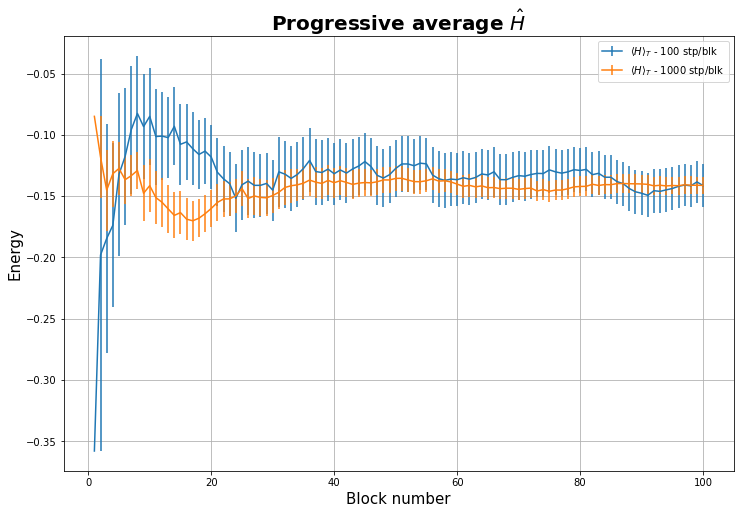

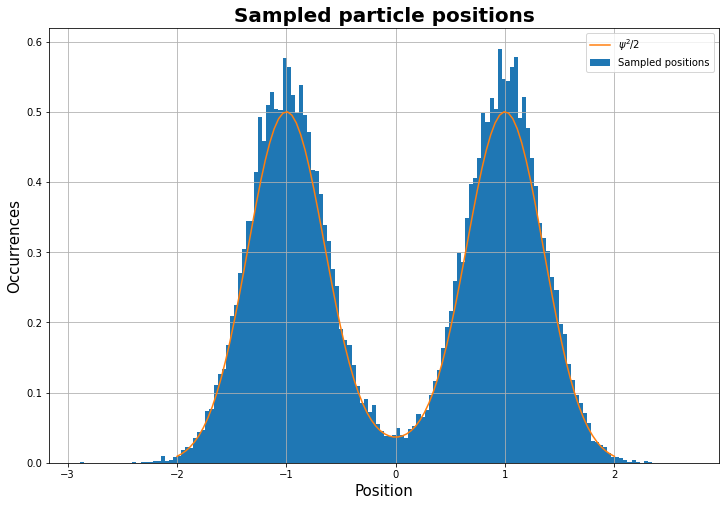

In [42]:
# uso mu, sigma = 1, 0.5

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,8))

pos, ave, err = np.loadtxt("ex8/H/result_min.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 100 stp/blk") 
pos, ave, err = np.loadtxt("ex8/H/result.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 1000 stp/blk") 

plt.ylabel('Energy', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
#plt.ylim(-0.525,-0.375)
#plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('Progressive average $\hat{H}$', fontsize = 20, fontweight = "bold")
plt.legend()

plt.show()

#---------------------------------------

plt.figure(figsize = (12,8))

histofill_blk = 1000                  # numero di posizioni salvate per blocco (cfr input.dat)
x = np.linspace(-2,2,100)      # uso l'ordinamento da 1 a N

mu = 1
sgm = 0.5
def f(x):
   return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

pos = np.loadtxt("ex8/H/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 150, density = "true", label = "Sampled positions")
plt.plot(x,f(x)**2/2, label = "$\psi^2/2$")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions", fontsize = 20, fontweight = "bold")
plt.grid(True)
plt.legend()

plt.show()

### <span id="ex-8.2">  Minimo di $\langle \hat H\rangle_T$ (SA) </span>[^](#toc)

Come anticipato, per trovare $\sigma$ e $\mu$ che minimizzano l'energia, ho dovuto estendere l'esercizio precedente per implementare il Simulated Annealing.

Ho scelto di fissare la temperatura di partenza a $T=1$, e i parametri iniziali $\mu=0.8$ e $\sigma=0.6$.

La legge con cui ho scelto di aggiornare la temperatura è
$$
\beta = \beta_{old}+d\beta
$$
con $\beta:=1/T$ e $d\beta = 1.5$, impostato dal file `input.dat`.

Ho strutturato il ciclo di annealing in maniera che esso si fermi quando l'errore (relativo) sulla stima di $\langle H \rangle_T$ è minore di una quantità richiesta (impostata dal file `input.dat`).
Una volta raggiunto il target, l'algoritmo fissa la temperatura ed esegue ancora un ciclo di misure per stimare l'incertezza sui parametri $\mu$ e $\sigma$, che continuano ad oscillare attorno al punto di minimo.

Di seguito sono ho riportato l'andamento di $\langle {\hat H} \rangle_T$ in funzione di $\beta$: gli errori sembrano non essere compatibili con il minimo teorico, ma la convergenza ad esso è comunque abbastanza buona. La sottostima degli errori potrebbe essere dovuta al fatto che le stime di $H$ variano in modo abbastanza casuale in una zona **limitata** del dominio $(\sigma,\mu)$, quindi le variazioni restano piccole.



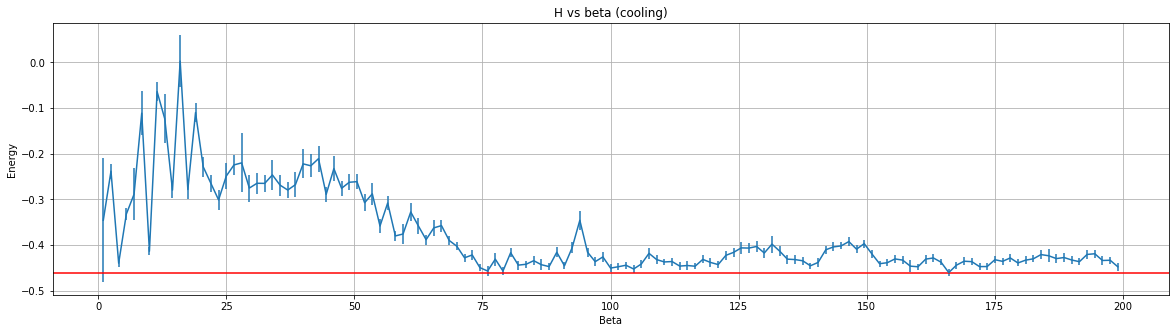

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,5))
beta, mu, sgm, H, errH = np.loadtxt("ex8/SA/traj.out", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
plt.errorbar(beta, H, errH)

plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('H vs beta (cooling)')
#plt.legend()

plt.show()



### Osservazioni

Anche con tanti punti campionati il valore di H risulta sempre maggiore di -0.46, perchè questa è l'energia del minimo, ma noi mediamo su energie che oscillano attorno al minimo e quindi in media si collocano al di sopra. Ho osservato che usando pochi campionamenti, l'errore statistico è grande e sufficiente a compensare questo difetto, tuttavia peggiora il risultato della simulazione per quanto riguarda la ricerca dei parametri variazionali.


Riporto di seguito la traiettoria descritta dalle stime di $H$ durante l'Annealing nello spazio $\mu$,$\sigma$, in funzione degli step.



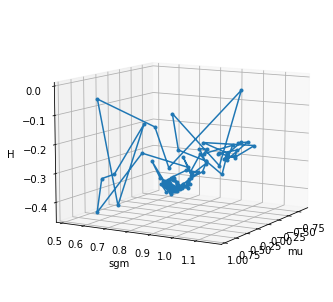

In [47]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
#fig = ax.figure(figsize = (10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(mu, sgm, H, marker='.', linestyle = "-")
#ax.plot(mu, sgm, H, c=H, marker='.', linestyle = "-")
ax.set_xlabel('mu')
ax.set_ylabel('sgm')
ax.set_zlabel('H')
ax.view_init(10, 30)

plt.show()


Di seguito ho riportato l'andamento di $\langle {\hat H} \rangle_T$ per i parametri trovati tramite il SA.
Osservo una discreta compatibilità con la previsione teorica, anche se la stima rimane leggermente al di sopra di essa, probabilmente per quanto detto prima.

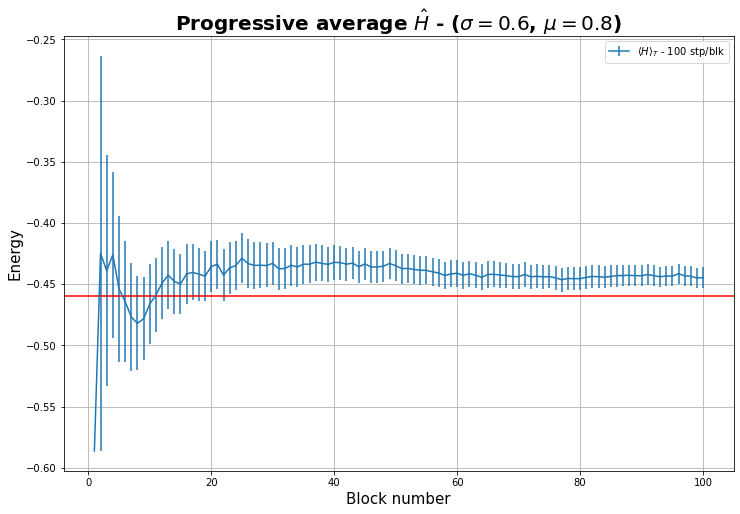

In [48]:
# uso mu, sigma = 0.8, 0.6

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize = (12,8))

pos, ave, err = np.loadtxt("ex8/SA/result.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = r"$\langle H\rangle_T$ - 100 stp/blk") 
plt.ylabel('Energy', fontsize = 15)
plt.xlabel('Block number', fontsize = 15)
plt.grid(True)
plt.title('Progressive average $\hat{H}$ - ($\sigma=0.6$, $\mu=0.8$)', fontsize = 20, fontweight = "bold")
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.legend()

plt.show()

Di seguito ho riportato l'istogramma delle posizioni campionate usando $100000$ step, corrispondente alla $|\Psi_T(x)|^2$.

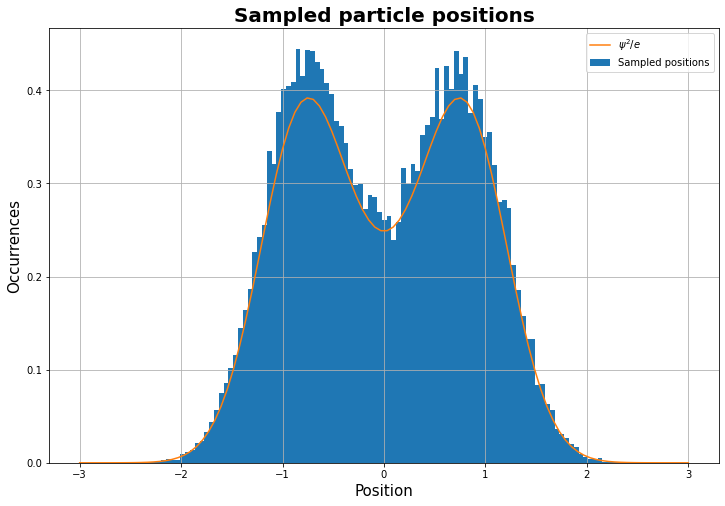

In [63]:
# uso mu, sigma = 0.8, 0.6

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100

#---------------------------------------

plt.figure(figsize = (12,8))

histofill_blk = 1000                  # numero di posizioni salvate per blocco (cfr input.dat)
x = np.linspace(-3,3,100)      # uso l'ordinamento da 1 a N

mu = 0.8
sgm = 0.6
def f(x):
   return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

pos = np.loadtxt("ex8/SA/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.hist(pos, 100, density = "true", label = "Sampled positions")
plt.plot(x,f(x)**2/np.e, label = "$\psi^2/e$")
plt.ylabel('Occurrences', fontsize = 15)
plt.xlabel('Position', fontsize = 15)
plt.title("Sampled particle positions", fontsize = 20, fontweight = "bold")
plt.grid(True)
plt.legend()

plt.show()


### Ulteriori grafici

Riporto infine altri grafici che rappresentano l'ultima fase della simulazione, per la stima delle incertezze sui parametri.

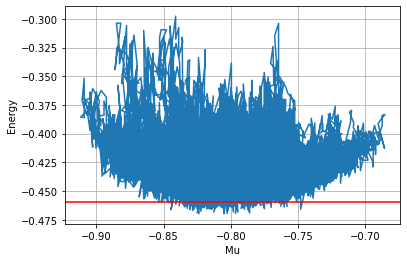

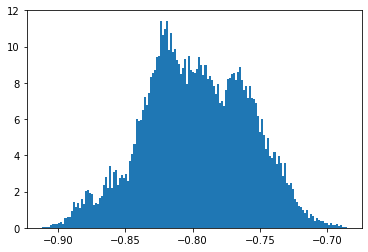

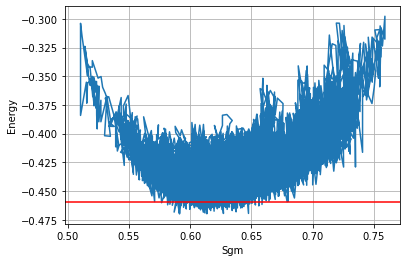

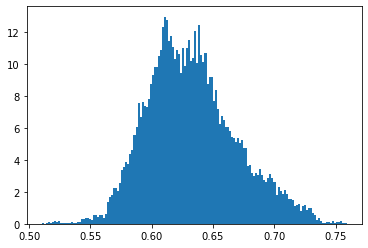

In [64]:



step, mu, sgm, H = np.loadtxt("ex8/SA/traj_last.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig = plt.figure()
plt.plot(mu, H, marker = None,linestyle = None)
plt.ylabel('Energy')
plt.xlabel('Mu')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r')
plt.show()

plt.hist(mu, 150, density = "true")
plt.show()

plt.plot(sgm, H, marker = None,linestyle = None)
plt.ylabel('Energy')
plt.xlabel('Sgm')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r')
plt.show()

plt.hist(sgm, 150, density = "true")
plt.show()

